# NOTAM Analysis

Please note that the data for this analysis is saved locally in a `data` folder that is one level above (a parent folder) to where the [GitHub](https://github.com/DAEN-Team-1/Final "GitHub") files have been saved. This was done because a lot of the data files are too large to be included in the GitHub repoo.

In [1]:
# imports
import pandas as pd
import numpy  as np
# import bamboolib as bam

In [2]:
# read data
#            not                     parsed               not           not
date_cols = ['POSSIBLE_START_DATE', 'POSSIBLE_END_DATE', 'ISSUE_DATE', 'CANCELED_DATE']
df = pd.read_csv('data/notam_20201027_commas_quotes.csv', on_bad_lines='skip', encoding='utf-16', low_memory=False)

Look at first few rows of data

In [3]:
df.head()

,NOTAM_REC_ID,FNS_ID,FILENAME,NOTAM_ID,NOTAM_TYPE,RELATED_NOTAM_ID,SIMPLE_TEXT,LOC_ID_ACCOUNTABLE_ORG,NOTAM_NUMBER,RELATED_NOTAM_NUMBER,...,POSSIBLE_END_DATE,ISSUE_DATE,CANCELED_DATE,AFFECTED_FIR,DESIGNATOR,DESIGNATOR_NAME,LOCATION_NAME,ACCOUNT_ID,LOCATION_CODE,LAUNCHES_REC_ID
0,1,FNS_ID_43130705,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0604/16,NaN,NaN,!SUAC 05/604 ZAU AIRSPACE VOLK SOUTH MOA ACT 5...,SUAC,05/604,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZAU ARTCC,SUAC,ZAU,NaN
1,2,FNS_ID_43130704,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0603/16,NaN,NaN,!SUAC 05/603 ZAU AIRSPACE VOLK EAST MOA ACT 80...,SUAC,05/603,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZAU ARTCC,SUAC,ZAU,NaN
2,3,FNS_ID_43130706,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0605/16,NaN,NaN,!SUAC 05/605 ZMP AIRSPACE FALLS 1 MOA ACT 500F...,SUAC,05/605,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN
3,4,FNS_ID_43130708,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0607/16,NaN,NaN,!SUAC 05/607 ZMP AIRSPACE FALLS 2 MOA ACT 500F...,SUAC,05/607,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN
4,5,FNS_ID_43130703,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0602/16,NaN,NaN,!SUAC 05/602 ZMP AIRSPACE VOLK WEST MOA ACT 10...,SUAC,05/602,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN


Get information on the dataframe
* 1,649,078 rows
* 37 columns
* With the exception of `NOTAM_REC_ID` and `LAUNCHES_REC_ID`, all fields appear to be strings. 
    * This may require updating in order to 
* Aside from `LAUNCHES_REC_ID`, most columns have only a few hundred non-null entries, suggesting that the data is very sparse

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649078 entries, 0 to 1649077
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NOTAM_REC_ID            1649078 non-null  int64  
 1   FNS_ID                  1649078 non-null  object 
 2   FILENAME                1649078 non-null  object 
 3   NOTAM_ID                1649049 non-null  object 
 4   NOTAM_TYPE              1427935 non-null  object 
 5   RELATED_NOTAM_ID        368132 non-null   object 
 6   SIMPLE_TEXT             827962 non-null   object 
 7   LOC_ID_ACCOUNTABLE_ORG  785649 non-null   object 
 8   NOTAM_NUMBER            782486 non-null   object 
 9   RELATED_NOTAM_NUMBER    125566 non-null   object 
 10  TEXT                    1641012 non-null  object 
 11  Q_CODE                  1008959 non-null  object 
 12  Q_CODE_INTERPRETATION   740483 non-null   object 
 13  A_CODE                  1141035 non-null  object 
 14  B_

Get summary stats

In [5]:
df.describe()

,NOTAM_REC_ID,LAUNCHES_REC_ID
count,1.649078e+06,0.0
mean,8.253116e+05,NaN
std,4.764870e+05,NaN
min,1.000000e+00,NaN
25%,4.126272e+05,NaN
50%,8.253245e+05,NaN
75%,1.238010e+06,NaN
max,1.650468e+06,NaN


## Examine column by column

#### NOTAM_REC_ID
* Seems to be a zero-indexed, sequence of indexes.

In [6]:
df['NOTAM_REC_ID']

0                1
1                2
2                3
3                4
4                5
            ...   
1649073    1650464
1649074    1650465
1649075    1650466
1649076    1650467
1649077    1650468
Name: NOTAM_REC_ID, Length: 1649078, dtype: int64

In [7]:
df['NOTAM_REC_ID'].value_counts(dropna=False)> 1

1          False
1100516    False
1100526    False
1100525    False
1100524    False
           ...  
550177     False
550176     False
550175     False
550174     False
1650468    False
Name: NOTAM_REC_ID, Length: 1649078, dtype: bool

#### FNS_ID
* All unique

In [8]:
df['FNS_ID']

0          FNS_ID_43130705
1          FNS_ID_43130704
2          FNS_ID_43130706
3          FNS_ID_43130708
4          FNS_ID_43130703
                ...       
1649073    FNS_ID_57059411
1649074    FNS_ID_57059413
1649075    FNS_ID_57059417
1649076    FNS_ID_57059418
1649077    FNS_ID_57059420
Name: FNS_ID, Length: 1649078, dtype: object

In [9]:
# All are unique
df['FNS_ID'].value_counts() > 1

FNS_ID_43130705    False
FNS_ID_51126170    False
FNS_ID_51126193    False
FNS_ID_51084110    False
FNS_ID_51084080    False
                   ...  
FNS_ID_47265316    False
FNS_ID_47265319    False
FNS_ID_47265266    False
FNS_ID_47265223    False
FNS_ID_57059420    False
Name: FNS_ID, Length: 1649078, dtype: bool

#### FILENAME
* Do we have access to these files?
* Repeats, but cover an tiny proportion of the data. 

In [10]:
df['FILENAME']

0          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
2          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
3          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
4          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
                                 ...                        
1649073    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1649074    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1649075    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1649076    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1649077    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
Name: FILENAME, Length: 1649078, dtype: object

In [11]:
df['FILENAME'].value_counts(dropna=False)

E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20191001T1507Z_tmp.xml      10418
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20190503T1519Z_tmp.xml       4377
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160601T204707Z_tmp.xml     1858
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T173246Z_tmp.xml     1451
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160601T203755Z_tmp.xml     1411
                                                                           ...  
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180403T042219Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170916T234259Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180529T110910Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20161006T011234Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170828T110734Z_tmp.xml        1
Name: FILENAME, Length: 109453, dtype: int64

In [12]:
df['FILENAME'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20191001T1507Z_tmp.xml      0.00632
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20190503T1519Z_tmp.xml      0.00265
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160601T204707Z_tmp.xml    0.00113
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T173246Z_tmp.xml    0.00088
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160601T203755Z_tmp.xml    0.00086
                                                                            ...   
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180403T042219Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170916T234259Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180529T110910Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20161006T011234Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170828T110734Z_tmp.xml    0.00000
Name: FILENAME, Length: 109453, dtype: object

#### NOTAM_ID
* Repeats, but cover an tiny proportion of the data.

In [13]:
df['NOTAM_ID']

0           0604/16
1           0603/16
2           0605/16
3           0607/16
4           0602/16
             ...   
1649073     0377/20
1649074    A0123/20
1649075      05/026
1649076     0158/20
1649077    N1321/20
Name: NOTAM_ID, Length: 1649078, dtype: object

In [14]:
df['NOTAM_ID'].value_counts(dropna=False)

0001/17     4418
0002/17     3762
0003/17     3438
0001/18     3258
0004/17     3080
            ... 
2388/18        1
M2472/16       1
W0450/16       1
B0537/16       1
N1321/20       1
Name: NOTAM_ID, Length: 403403, dtype: int64

In [15]:
df['NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0001/17     0.00268
0002/17     0.00228
0003/17     0.00208
0001/18     0.00198
0004/17     0.00187
             ...   
2388/18     0.00000
M2472/16    0.00000
W0450/16    0.00000
B0537/16    0.00000
N1321/20    0.00000
Name: NOTAM_ID, Length: 403403, dtype: object

#### NOTAM_TYPE
* Majority are NOTAMN, at 61% of the data. 
* Other categories have significat proportions.
* Chart included

In [16]:
df['NOTAM_TYPE']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
1649073       NaN
1649074    NOTAMC
1649075    NOTAMN
1649076    NOTAMN
1649077    NOTAMN
Name: NOTAM_TYPE, Length: 1649078, dtype: object

In [17]:
df['NOTAM_TYPE'].value_counts(dropna=False)

NOTAMN    1016343
NOTAMC     281717
NaN        221143
NOTAMR     129875
Name: NOTAM_TYPE, dtype: int64

In [18]:
df['NOTAM_TYPE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NOTAMN    0.61631
NOTAMC    0.17083
NaN       0.13410
NOTAMR    0.07876
Name: NOTAM_TYPE, dtype: object

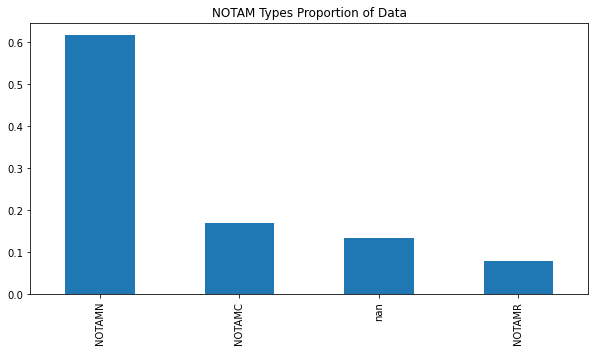

In [19]:
df['NOTAM_TYPE'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                 title='NOTAM Types Proportion of Data',
                                                                 figsize=(10, 5));

#### RELATED_NOTAM_ID
* Majority are NaNs, at 77% of the data.
* No other entry has a material proportion of the data.
* Repeats

In [20]:
df['RELATED_NOTAM_ID']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1649073         NaN
1649074    A0122/20
1649075         NaN
1649076         NaN
1649077         NaN
Name: RELATED_NOTAM_ID, Length: 1649078, dtype: object

In [21]:
df['RELATED_NOTAM_ID'].value_counts(dropna=False)

NaN         1280946
A0001/18        117
A0001/17         97
A0001/19         79
B0001/18         53
             ...   
R0119/16          1
8/2529            1
F0119/18          1
R0121/16          1
C0616/20          1
Name: RELATED_NOTAM_ID, Length: 173735, dtype: int64

In [22]:
df['RELATED_NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN         0.77676
A0001/18    0.00007
A0001/17    0.00006
A0001/19    0.00005
B0001/18    0.00003
             ...   
R0119/16    0.00000
8/2529      0.00000
F0119/18    0.00000
R0121/16    0.00000
C0616/20    0.00000
Name: RELATED_NOTAM_ID, Length: 173735, dtype: object

#### SIMPLE_TEXT
* Close to majority are NaNs, covering 49% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [23]:
df['SIMPLE_TEXT']

0          !SUAC 05/604 ZAU AIRSPACE VOLK SOUTH MOA ACT 5...
1          !SUAC 05/603 ZAU AIRSPACE VOLK EAST MOA ACT 80...
2          !SUAC 05/605 ZMP AIRSPACE FALLS 1 MOA ACT 500F...
3          !SUAC 05/607 ZMP AIRSPACE FALLS 2 MOA ACT 500F...
4          !SUAC 05/602 ZMP AIRSPACE VOLK WEST MOA ACT 10...
                                 ...                        
1649073    !ATL 05/377 ATL AIRSPACE UAS WI AN AREA DEFINE...
1649074                                                  NaN
1649075    !BTL 05/026 BTL NAV ILS RWY 23R U/S 2006011500...
1649076    !CDC 05/158 HCR RWY 04/22 UNSAFE DISABLED ACFT...
1649077                                                  NaN
Name: SIMPLE_TEXT, Length: 1649078, dtype: object

In [24]:
df['SIMPLE_TEXT'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [25]:
df['SIMPLE_TEXT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### LOC_ID_ACCOUNTABLE_ORG
* Majority are NaNs, at 51% of the data.
* FDC represents 10% of data, and a few others represent >1% of data.
* Repeats
* Includes chart

In [26]:
df['LOC_ID_ACCOUNTABLE_ORG']

0          SUAC
1          SUAC
2          SUAC
3          SUAC
4          SUAC
           ... 
1649073     ATL
1649074     NaN
1649075     BTL
1649076     CDC
1649077     NaN
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 1649078, dtype: object

In [27]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False)

NaN     863429
FDC     145464
SUAW     64710
SUAC     43768
SUAE     32492
         ...  
UACC         1
UATT         1
WABF         1
KIMM         1
WAHP         1
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 2321, dtype: int64

In [28]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN     0.52358
FDC     0.08821
SUAW    0.03924
SUAC    0.02654
SUAE    0.01970
         ...   
UACC    0.00000
UATT    0.00000
WABF    0.00000
KIMM    0.00000
WAHP    0.00000
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 2321, dtype: object

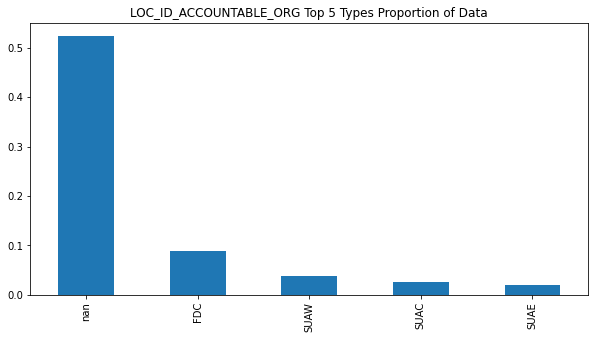

In [29]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                         title='LOC_ID_ACCOUNTABLE_ORG Top 5 Types Proportion of Data',
                                                                                         figsize=(10, 5));

#### NOTAM_NUMBER
* Majority are NaNs, at 51% of the data.
* No other entry has a material proportion of the data.
* Lots of repeats > what does this mean?

In [30]:
df['NOTAM_NUMBER']

0          05/604
1          05/603
2          05/605
3          05/607
4          05/602
            ...  
1649073    05/377
1649074       NaN
1649075    05/026
1649076    05/158
1649077       NaN
Name: NOTAM_NUMBER, Length: 1649078, dtype: object

In [31]:
df['NOTAM_NUMBER'].value_counts(dropna=False)

NaN       866592
05/001      1899
03/001      1872
09/001      1782
10/001      1776
           ...  
6/8887         1
6/8892         1
6/8920         1
6/8900         1
0/4796         1
Name: NOTAM_NUMBER, Length: 52949, dtype: int64

In [32]:
df['NOTAM_NUMBER'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN       0.52550
05/001    0.00115
03/001    0.00114
09/001    0.00108
10/001    0.00108
           ...   
6/8887    0.00000
6/8892    0.00000
6/8920    0.00000
6/8900    0.00000
0/4796    0.00000
Name: NOTAM_NUMBER, Length: 52949, dtype: object

#### RELATED_NOTAM_NUMBER
* Majority are NaNs, covering over 91% of the data.
* No other entry has a material proportion of the data.
* What does this field mean?

In [33]:
df['RELATED_NOTAM_NUMBER']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    NaN
1649075    NaN
1649076    NaN
1649077    NaN
Name: RELATED_NOTAM_NUMBER, Length: 1649078, dtype: object

In [34]:
df['RELATED_NOTAM_NUMBER'].value_counts(dropna=False)

NaN       1523512
8/3465         89
07/159         88
7/1870         87
7/3678         87
           ...   
6/4653          1
6/5008          1
9/7307          1
6/5072          1
05/668          1
Name: RELATED_NOTAM_NUMBER, Length: 41000, dtype: int64

In [35]:
df['RELATED_NOTAM_NUMBER'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN       0.92386
8/3465    0.00005
07/159    0.00005
7/1870    0.00005
7/3678    0.00005
           ...   
6/4653    0.00000
6/5008    0.00000
9/7307    0.00000
6/5072    0.00000
05/668    0.00000
Name: RELATED_NOTAM_NUMBER, Length: 41000, dtype: object

#### TEXT
* There are NaNs, and its the biggest cateogry, but only covers 0.006% of data.
* Repeats

In [36]:
df['TEXT']

0          AIRSPACE VOLK SOUTH MOA ACT 500FT UP TO BUT NO...
1          AIRSPACE VOLK EAST MOA ACT 8000FT UP TO BUT NO...
2          AIRSPACE FALLS 1 MOA ACT 500FT UP TO BUT NOT I...
3          AIRSPACE FALLS 2 MOA ACT 500FT UP TO BUT NOT I...
4          AIRSPACE VOLK WEST MOA ACT 100FT UP TO BUT NOT...
                                 ...                        
1649073    AIRSPACE UAS WI AN AREA DEFINED AS 2NM RADIUS ...
1649074    A0123/20 NOTAMC A0122/20  Q) KZSE/QOBXX/IV/M/A...
1649075                                  NAV ILS RWY 23R U/S
1649076                RWY 04/22 UNSAFE DISABLED ACFT NE END
1649077                                FIRE AND RESCUE CAT 5
Name: TEXT, Length: 1649078, dtype: object

In [37]:
df['TEXT'].value_counts(dropna=False)

NaN                                                                                                                                                                                       8066
NAV VORTAC NOT MNT                                                                                                                                                                        6213
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.    5192
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES     4977
NAV VOR/DME NOT MNT                                                                                                                                                                       4704
                                             

In [38]:
df['TEXT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                                                                                                                                       0.00489
NAV VORTAC NOT MNT                                                                                                                                                                        0.00377
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.    0.00315
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES     0.00302
NAV VOR/DME NOT MNT                                                                                                                                                                       0.00285
                              

#### Q_CODE
* Close to majority are NaNs, covering 39% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart

In [39]:
df['Q_CODE']

0                                                 NaN
1                                                 NaN
2                                                 NaN
3                                                 NaN
4                                                 NaN
                              ...                    
1649073                                           NaN
1649074     KZSE/QOBXX/IV/M/AE/000/999/4222N12252W005
1649075           ZAU//I/NBO/A/000/999/4218N08515W005
1649076                                           NaN
1649077    YBBB/QFFCG/IV/NBO/A/000/999/3019S15307E005
Name: Q_CODE, Length: 1649078, dtype: object

In [40]:
df['Q_CODE'].value_counts(dropna=False)

NaN                                           640119
/QRRCA/                                        50722
/QXXXX/                                        20723
LRBB/QRRCA/IV/BO                               12068
YUXX/QARCA/I/NBO/E/000/999/2537S13421E999      10022
                                               ...  
USTR/QPMCH/IV/NBO/A/000/999/5710N06519E005         1
UUWV/QAELC/IV/NBO/E/040/100/5734N04009E027         1
UUWV/QARLC/IV/NBO/E/050/100/5502N03735E238         1
UUWV/QAELC/IV/NBO/E/040/100/5145N03618E027         1
KZSE/QOBXX/IV/M/AE/000/999/4222N12252W005          1
Name: Q_CODE, Length: 118431, dtype: int64

In [41]:
df['Q_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                           0.38817
/QRRCA/                                       0.03076
/QXXXX/                                       0.01257
LRBB/QRRCA/IV/BO                              0.00732
YUXX/QARCA/I/NBO/E/000/999/2537S13421E999     0.00608
                                               ...   
USTR/QPMCH/IV/NBO/A/000/999/5710N06519E005    0.00000
UUWV/QAELC/IV/NBO/E/040/100/5734N04009E027    0.00000
UUWV/QARLC/IV/NBO/E/050/100/5502N03735E238    0.00000
UUWV/QAELC/IV/NBO/E/040/100/5145N03618E027    0.00000
KZSE/QOBXX/IV/M/AE/000/999/4222N12252W005     0.00000
Name: Q_CODE, Length: 118431, dtype: object

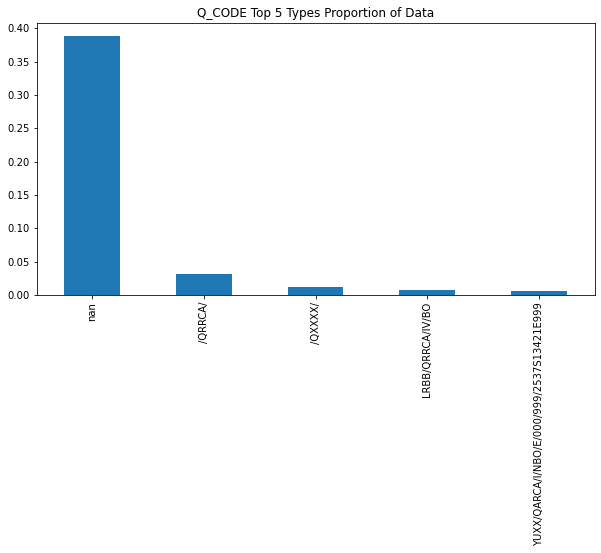

In [42]:
df['Q_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='Q_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### Q_CODE_INTERPRETATION
* Majority are NaNs, covering 56% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart
* Counts do not match Q_CODE > what could this mean?

In [43]:
df['Q_CODE_INTERPRETATION']

0                                             NaN
1                                             NaN
2                                             NaN
3                                             NaN
4                                             NaN
                            ...                  
1649073                                       NaN
1649074                                  OBSTACLE
1649075                                       NaN
1649076                                       NaN
1649077    FIRE FIGHTING AND RESCUE DOWNGRADED TO
Name: Q_CODE_INTERPRETATION, Length: 1649078, dtype: object

In [44]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False)

NaN                                                                   908595
RESTRICTED AREA ACTIVATED                                             127476
TEMPORARY RESTRICTED AREA ACTIVATED                                    65856
AERODROME                                                              57406
DANGER AREA ACTIVATED                                                  36991
                                                                       ...  
AIRCRAFT STANDS REALIGNED                                                  1
STANDARD INSTRUMENT ARRIVAL STAR AVAILABLE FOR DAYLIGHT OPERATIONS         1
RUNWAY COVERED BY ICE                                                      1
APPROACH CONTROL ACTIVATED                                                 1
THRESHOLD REALIGNED                                                        1
Name: Q_CODE_INTERPRETATION, Length: 1578, dtype: int64

In [45]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                   0.55097
RESTRICTED AREA ACTIVATED                                             0.07730
TEMPORARY RESTRICTED AREA ACTIVATED                                   0.03994
AERODROME                                                             0.03481
DANGER AREA ACTIVATED                                                 0.02243
                                                                       ...   
AIRCRAFT STANDS REALIGNED                                             0.00000
STANDARD INSTRUMENT ARRIVAL STAR AVAILABLE FOR DAYLIGHT OPERATIONS    0.00000
RUNWAY COVERED BY ICE                                                 0.00000
APPROACH CONTROL ACTIVATED                                            0.00000
THRESHOLD REALIGNED                                                   0.00000
Name: Q_CODE_INTERPRETATION, Length: 1578, dtype: object

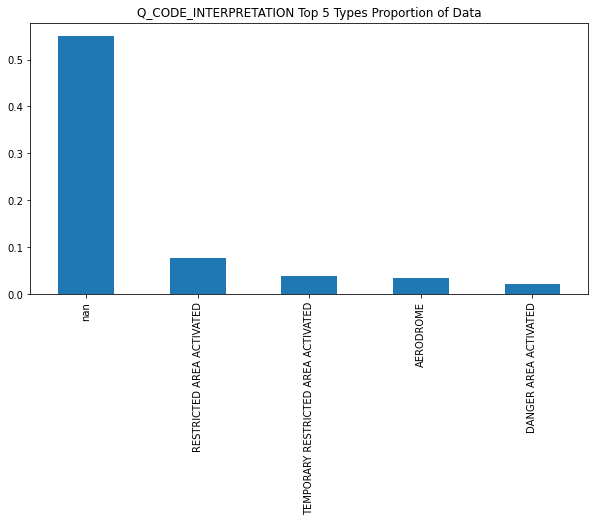

In [46]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                        title='Q_CODE_INTERPRETATION Top 5 Types Proportion of Data',
                                                                                        figsize=(10, 5));

#### A_CODE
* Majority are NaNs, covering 56% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart

In [47]:
df['A_CODE']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1649073     NaN
1649074    KMFR
1649075    KBTL
1649076     NaN
1649077    YCFS
Name: A_CODE, Length: 1649078, dtype: object

In [48]:
df['A_CODE'].value_counts(dropna=False)

NaN                        508043
LRBB                        28899
UUWV                        27814
YMMM/YBBB                   17699
EGTT                        15585
                            ...  
SANO                            1
ATA                             1
2018-04-19 19:30:00.000         1
WHERE                           1
HECP                            1
Name: A_CODE, Length: 12976, dtype: int64

In [49]:
df['A_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                        0.30808
LRBB                       0.01752
UUWV                       0.01687
YMMM/YBBB                  0.01073
EGTT                       0.00945
                            ...   
SANO                       0.00000
ATA                        0.00000
2018-04-19 19:30:00.000    0.00000
WHERE                      0.00000
HECP                       0.00000
Name: A_CODE, Length: 12976, dtype: object

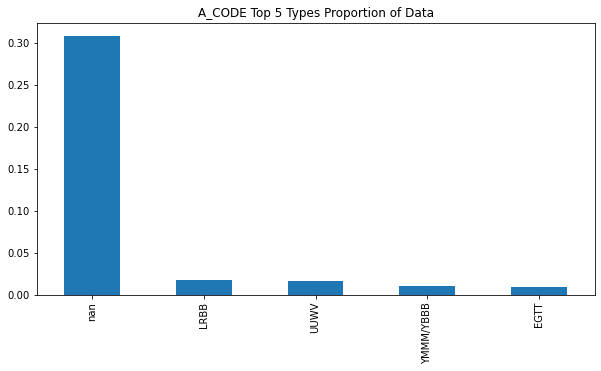

In [50]:
df['A_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='A_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### B_CODE
* Close to majority are NaNs, covering 41% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [51]:
df['B_CODE']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
1649073                        NaN
1649074    2020-05-31 19:48:00.000
1649075    2020-06-01 15:00:00.000
1649076                        NaN
1649077    2020-05-31 20:00:00.000
Name: B_CODE, Length: 1649078, dtype: object

In [52]:
df['B_CODE'].value_counts(dropna=False)

NaN                        666797
2019-10-10 09:01:00.000       378
2019-12-05 00:00:00.000       342
2019-05-23 00:00:00.000       341
2018-12-06 00:00:00.000       324
                            ...  
2018-03-08 09:45:00.000         1
2016-11-30 19:28:00.000         1
2018-03-06 18:06:00.000         1
2018-03-06 18:07:00.000         1
2020-05-31 20:00:00.000         1
Name: B_CODE, Length: 349624, dtype: int64

In [53]:
df['B_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                        0.40435
2019-10-10 09:01:00.000    0.00023
2019-12-05 00:00:00.000    0.00021
2019-05-23 00:00:00.000    0.00021
2018-12-06 00:00:00.000    0.00020
                            ...   
2018-03-08 09:45:00.000    0.00000
2016-11-30 19:28:00.000    0.00000
2018-03-06 18:06:00.000    0.00000
2018-03-06 18:07:00.000    0.00000
2020-05-31 20:00:00.000    0.00000
Name: B_CODE, Length: 349624, dtype: object

#### C_CODE
* Close to majority are NaNs, covering 49% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [54]:
df['C_CODE']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
1649073                        NaN
1649074                        NaN
1649075    2020-06-01 17:00:00.000
1649076                        NaN
1649077    2020-06-01 05:00:00.000
Name: C_CODE, Length: 1649078, dtype: object

In [55]:
df['C_CODE'].value_counts(dropna=False)

NaN                        820617
2018-01-31 23:59:00.000       698
2016-08-31 23:59:00.000       535
2017-10-31 23:59:00.000       529
2017-07-31 23:59:00.000       524
                            ...  
2018-03-27 13:54:00.000         1
2018-11-20 17:12:00.000         1
2018-11-20 17:13:00.000         1
2018-11-20 17:17:00.000         1
2020-06-03 04:15:00.000         1
Name: C_CODE, Length: 120658, dtype: int64

In [56]:
df['C_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                        0.49762
2018-01-31 23:59:00.000    0.00042
2016-08-31 23:59:00.000    0.00032
2017-10-31 23:59:00.000    0.00032
2017-07-31 23:59:00.000    0.00032
                            ...   
2018-03-27 13:54:00.000    0.00000
2018-11-20 17:12:00.000    0.00000
2018-11-20 17:13:00.000    0.00000
2018-11-20 17:17:00.000    0.00000
2020-06-03 04:15:00.000    0.00000
Name: C_CODE, Length: 120658, dtype: object

#### D_CODE
* Majority are NaNs, covering 90% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [57]:
df['D_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    NaN
1649075    NaN
1649076    NaN
1649077    NaN
Name: D_CODE, Length: 1649078, dtype: object

In [58]:
df['D_CODE'].value_counts(dropna=False)

NaN                                                                                 1479291
DAILY 0600-1800                                                                        1320
H24                                                                                    1285
DAILY 0500-1700                                                                        1194
SR-SS                                                                                  1188
                                                                                     ...   
06 1540-2100, 07 1200-2100, 08 11-15 18-22 25-29 0500-2100,   09 16 23 0500-1400          1
07 1200-2100 08 0500-2000 09 16 23 0500-1400 11-15 18-22 25-   29 0500-2100               1
110 FT AGL 2446 MSL. LGTD AND PAINTED  1705091752-PERM                                    1
DEC 07 TIL 2300 DEC 08 BTN 0730/2300                                                      1
JUN 04 AND 18 HR 0700-1500                                                      

In [59]:
df['D_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                                 0.89704
DAILY 0600-1800                                                                     0.00080
H24                                                                                 0.00078
DAILY 0500-1700                                                                     0.00072
SR-SS                                                                               0.00072
                                                                                     ...   
06 1540-2100, 07 1200-2100, 08 11-15 18-22 25-29 0500-2100,   09 16 23 0500-1400    0.00000
07 1200-2100 08 0500-2000 09 16 23 0500-1400 11-15 18-22 25-   29 0500-2100         0.00000
110 FT AGL 2446 MSL. LGTD AND PAINTED  1705091752-PERM                              0.00000
DEC 07 TIL 2300 DEC 08 BTN 0730/2300                                                0.00000
JUN 04 AND 18 HR 0700-1500                                                      

#### E_CODE
* No entry has a material proportion of the data.
* A few repeats

In [60]:
df['E_CODE']

0          AIRSPACE VOLK SOUTH MOA ACT 500FT UP TO BUT NO...
1          AIRSPACE VOLK EAST MOA ACT 8000FT UP TO BUT NO...
2          AIRSPACE FALLS 1 MOA ACT 500FT UP TO BUT NOT I...
3          AIRSPACE FALLS 2 MOA ACT 500FT UP TO BUT NOT I...
4          AIRSPACE VOLK WEST MOA ACT 100FT UP TO BUT NOT...
                                 ...                        
1649073    AIRSPACE UAS WI AN AREA DEFINED AS 2NM RADIUS ...
1649074    CRANE (ASN UNKNOWN) 422221N1225246W (0.76NM NW...
1649075                                  NAV ILS RWY 23R U/S
1649076                RWY 04/22 UNSAFE DISABLED ACFT NE END
1649077                               FIRE AND RESCUE CAT 5 
Name: E_CODE, Length: 1649078, dtype: object

In [61]:
df['E_CODE'].value_counts(dropna=False)

CNL.                                                                                                                                                                                       13686
CNL. NEW NOTAM TO FLW.                                                                                                                                                                      7791
NAV VORTAC NOT MNT                                                                                                                                                                          6232
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.      5192
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES       5000
                                   

In [62]:
df['E_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

CNL.                                                                                                                                                                                       0.00830
CNL. NEW NOTAM TO FLW.                                                                                                                                                                     0.00472
NAV VORTAC NOT MNT                                                                                                                                                                         0.00378
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.     0.00315
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES      0.00303
                         

#### F_CODE
* Close to a majority are NaNs or 000, covering 39% and 39% of the data, repectively. 
* A few other categories represent >1% of data.
* A few repeats
* Includes chart

In [63]:
df['F_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    000
1649075    000
1649076    NaN
1649077    000
Name: F_CODE, Length: 1649078, dtype: object

In [64]:
df['F_CODE'].value_counts(dropna=False)

000           634660
NaN           629677
SFC           162156
GND            85714
SEE             3716
               ...  
469.2FT            1
562/562/52         1
68/6/68            1
OPEN               1
028                1
Name: F_CODE, Length: 2550, dtype: int64

In [65]:
df['F_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

000           0.38486
NaN           0.38184
SFC           0.09833
GND           0.05198
SEE           0.00225
               ...   
469.2FT       0.00000
562/562/52    0.00000
68/6/68       0.00000
OPEN          0.00000
028           0.00000
Name: F_CODE, Length: 2550, dtype: object

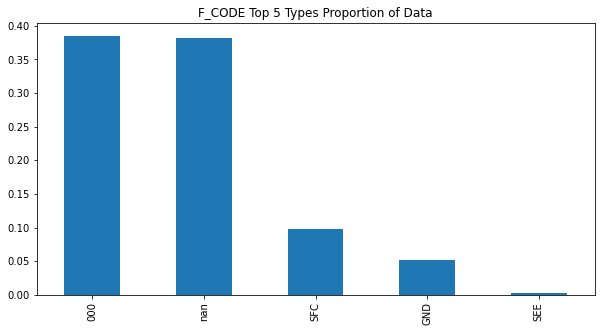

In [66]:
df['F_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='F_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### G_CODE
* Close to a majority are NaNs or 999, covering 39% and 35% of the data, repectively. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [67]:
df['G_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    999
1649075    999
1649076    NaN
1649077    999
Name: G_CODE, Length: 1649078, dtype: object

In [68]:
df['G_CODE'].value_counts(dropna=False)

NaN                629900
999                578887
UNL                 14353
5000FT               9856
FL230                7779
                    ...  
M0196/18 NOTAMN         1
M0195/18 NOTAMN         1
M0194/18 NOTAMN         1
4393FT                  1
1525                    1
Name: G_CODE, Length: 5739, dtype: int64

In [69]:
df['G_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                0.38197
999                0.35104
UNL                0.00870
5000FT             0.00598
FL230              0.00472
                    ...   
M0196/18 NOTAMN    0.00000
M0195/18 NOTAMN    0.00000
M0194/18 NOTAMN    0.00000
4393FT             0.00000
1525               0.00000
Name: G_CODE, Length: 5739, dtype: object

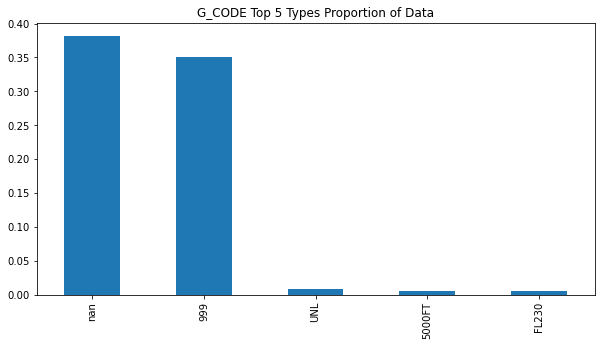

In [70]:
df['G_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='G_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### CLASSIFICATION
* Close to a majority are INTL or DOM, covering 40% and 38% of the data, repectively. 
* Next two biggest categories, MIL and FDC, both cover more than 10% of the data each. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [71]:
df['CLASSIFICATION']

0           DOM
1           DOM
2           DOM
3           DOM
4           DOM
           ... 
1649073     DOM
1649074    INTL
1649075     DOM
1649076     DOM
1649077    INTL
Name: CLASSIFICATION, Length: 1649078, dtype: object

In [72]:
df['CLASSIFICATION'].value_counts(dropna=False)

INTL               676133
DOM                637021
MIL                187870
FDC                145466
LMIL                 2202
                    ...  
M0485/17 NOTAMN         1
M0484/17 NOTAMN         1
M0486/17 NOTAMN         1
M0482/17 NOTAMN         1
M0101/20 NOTAMN         1
Name: CLASSIFICATION, Length: 115, dtype: int64

In [73]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

INTL               0.41001
DOM                0.38629
MIL                0.11392
FDC                0.08821
LMIL               0.00134
                    ...   
M0485/17 NOTAMN    0.00000
M0484/17 NOTAMN    0.00000
M0486/17 NOTAMN    0.00000
M0482/17 NOTAMN    0.00000
M0101/20 NOTAMN    0.00000
Name: CLASSIFICATION, Length: 115, dtype: object

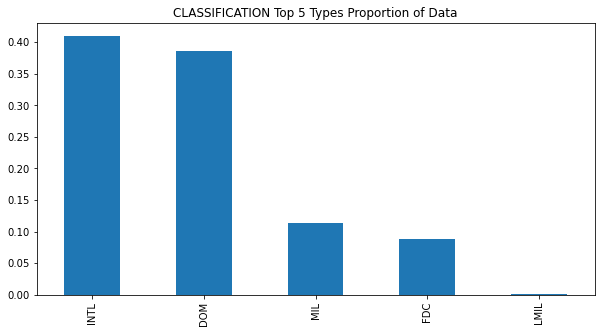

In [74]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='CLASSIFICATION Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### POSSIBLE_NOTAM_ID
* How does this relate to NOTAM_ID? Proportions do not match. 
* Repeats, but cover an tiny proportion of the data.

In [75]:
df['POSSIBLE_NOTAM_ID']

0                  0604/16
1                  0603/16
2                  0605/16
3                  0607/16
4                  0602/16
                ...       
1649073            0377/20
1649074    A0123/20 NOTAMC
1649075     0026/20 NOTAMN
1649076     0158/20 NOTAMN
1649077    N1321/20 NOTAMN
Name: POSSIBLE_NOTAM_ID, Length: 1649078, dtype: object

In [76]:
df['POSSIBLE_NOTAM_ID'].value_counts(dropna=False)

0001/17 NOTAMN     5183
0002/17 NOTAMN     4275
0003/17 NOTAMN     3895
0001/18 NOTAMN     3795
0004/17 NOTAMN     3551
                   ... 
7655/17 NOTAMN        1
SWEN0803/17           1
J7867/17 NOTAMN       1
J7868/17 NOTAMN       1
N1321/20 NOTAMN       1
Name: POSSIBLE_NOTAM_ID, Length: 500682, dtype: int64

In [77]:
df['POSSIBLE_NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0001/17 NOTAMN     0.00314
0002/17 NOTAMN     0.00259
0003/17 NOTAMN     0.00236
0001/18 NOTAMN     0.00230
0004/17 NOTAMN     0.00215
                    ...   
7655/17 NOTAMN     0.00000
SWEN0803/17        0.00000
J7867/17 NOTAMN    0.00000
J7868/17 NOTAMN    0.00000
N1321/20 NOTAMN    0.00000
Name: POSSIBLE_NOTAM_ID, Length: 500682, dtype: object

#### MIN_ALT
* 0 as a string and 0 as numeric both included. 
    * parsed through custom fuction
* Close to a majority are 0.000 or NaN, covering 59% and 29% of the data, repectively.
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [78]:
# Helper function as to_numeric is not working
def convert_to_float(row):
    if isinstance(row, str):
        try:
            return float(row)
        except:
            return row
    else:
        return row

In [79]:
df['MIN_ALT'] = df['MIN_ALT'].apply(convert_to_float)

In [80]:
df['MIN_ALT'].value_counts(dropna=False)

0.0                    982993
NaN                    461494
110.0                   14704
5.0                     10701
100.0                   10362
                        ...  
19.6                        1
2016-10-04 12:59:00         1
11.637                      1
11.316                      1
10.397                      1
Name: MIN_ALT, Length: 1600, dtype: int64

In [81]:
df['MIN_ALT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0.0                    0.59609
NaN                    0.27985
110.0                  0.00892
5.0                    0.00649
100.0                  0.00628
                        ...   
19.6                   0.00000
2016-10-04 12:59:00    0.00000
11.637                 0.00000
11.316                 0.00000
10.397                 0.00000
Name: MIN_ALT, Length: 1600, dtype: object

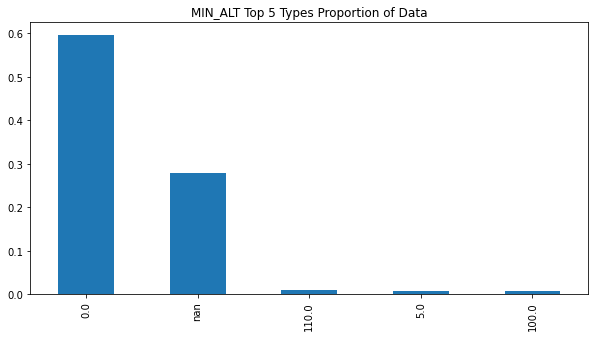

In [82]:
df['MIN_ALT'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                          title='MIN_ALT Top 5 Types Proportion of Data',
                                                                          figsize=(10, 5));

#### MAX_ALT
* 0 as a string and 0 as numeric both included. 
    * Parsed through custom fuction
* Close to a majority are 999.0 or NaN, covering 39% and 31% of the data, repectively.
* A few other entries have a material proportion of the data.
* A few repeats
* Includes chart

In [83]:
df['MAX_ALT'] = df['MAX_ALT'].apply(convert_to_float)

In [84]:
df['MAX_ALT'].value_counts(dropna=False)

999.000    649056
NaN        514100
180.000     56757
50.000      17385
20.000      16873
            ...  
32.910          1
54.800          1
5.459           1
43.120          1
27.780          1
Name: MAX_ALT, Length: 3625, dtype: int64

In [85]:
df['MAX_ALT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

999.000    0.39359
NaN        0.31175
180.000    0.03442
50.000     0.01054
20.000     0.01023
            ...   
32.910     0.00000
54.800     0.00000
5.459      0.00000
43.120     0.00000
27.780     0.00000
Name: MAX_ALT, Length: 3625, dtype: object

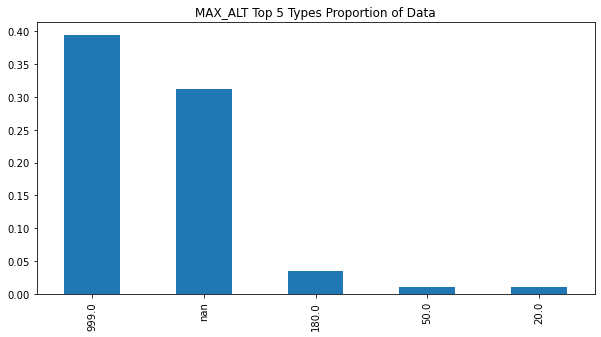

In [86]:
df['MAX_ALT'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                          title='MAX_ALT Top 5 Types Proportion of Data',
                                                                          figsize=(10, 5));

#### MIN_ALT_REF_TYPE
* Close to a majority are MSL, NaN, or AGL, covering 43%, 39%, and 20% of the data, repectively. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [87]:
df['MIN_ALT_REF_TYPE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    AGL
1649074    MSL
1649075    MSL
1649076    NaN
1649077    MSL
Name: MIN_ALT_REF_TYPE, Length: 1649078, dtype: object

In [88]:
df['MIN_ALT_REF_TYPE'].value_counts(dropna=False)

MSL                    722917
NaN                    597539
AGL                    328377
2018-11-07 12:56:00         2
2019-08-06 17:57:00         2
                        ...  
2017-12-14 15:54:00         1
2017-12-14 16:27:00         1
2017-12-14 16:41:00         1
2018-01-09 16:14:00         1
2020-03-19 11:48:00         1
Name: MIN_ALT_REF_TYPE, Length: 215, dtype: int64

In [89]:
df['MIN_ALT_REF_TYPE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

MSL                    0.43838
NaN                    0.36235
AGL                    0.19913
2018-11-07 12:56:00    0.00000
2019-08-06 17:57:00    0.00000
                        ...   
2017-12-14 15:54:00    0.00000
2017-12-14 16:27:00    0.00000
2017-12-14 16:41:00    0.00000
2018-01-09 16:14:00    0.00000
2020-03-19 11:48:00    0.00000
Name: MIN_ALT_REF_TYPE, Length: 215, dtype: object

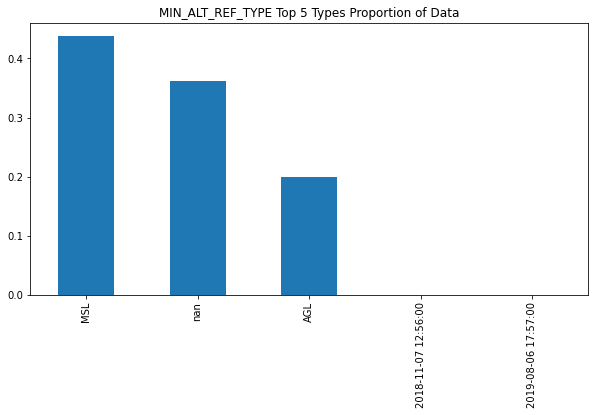

In [90]:
df['MIN_ALT_REF_TYPE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                   title='MIN_ALT_REF_TYPE Top 5 Types Proportion of Data',
                                                                                   figsize=(10, 5));

#### MAX_ALT_REF_TYPE
* Close to a majority are MSL or NaN, covering 55%, and 41% of the data, repectively. 
* A couple of other entries have a material proportion of the data.
* A few repeats
* Includes chart

In [91]:
df['MAX_ALT_REF_TYPE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    MSL
1649075    MSL
1649076    NaN
1649077    MSL
Name: MAX_ALT_REF_TYPE, Length: 1649078, dtype: object

In [92]:
df['MAX_ALT_REF_TYPE'].value_counts(dropna=False)

MSL                    915942
NaN                    665667
AGL                     50709
FL                      16409
2017-03-02 05:00:00         6
                        ...  
2018-03-30 17:00:00         1
2016-08-31 03:00:00         1
2018-03-30 19:48:00         1
2018-03-30 19:43:00         1
2020-03-25 18:09:00         1
Name: MAX_ALT_REF_TYPE, Length: 202, dtype: int64

In [93]:
df['MAX_ALT_REF_TYPE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

MSL                    0.55543
NaN                    0.40366
AGL                    0.03075
FL                     0.00995
2017-03-02 05:00:00    0.00000
                        ...   
2018-03-30 17:00:00    0.00000
2016-08-31 03:00:00    0.00000
2018-03-30 19:48:00    0.00000
2018-03-30 19:43:00    0.00000
2020-03-25 18:09:00    0.00000
Name: MAX_ALT_REF_TYPE, Length: 202, dtype: object

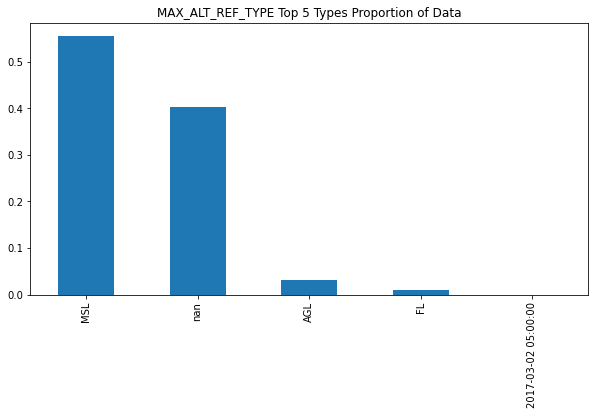

In [94]:
df['MAX_ALT_REF_TYPE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                   title='MAX_ALT_REF_TYPE Top 5 Types Proportion of Data',
                                                                                   figsize=(10, 5));

#### POSSIBLE_START_DATE
* Did not get parsed as dates. 
    * Parsed through custom fuction
* ZNY as an oddball entry
* Most entries from 2016-2019
* Includes chart

In [95]:
# Helper function as to_numeric is not working
from datetime import datetime
def convert_to_date(row):
    try:
        return datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    except:
        return row

In [96]:
df['POSSIBLE_START_DATE'] = df['POSSIBLE_START_DATE'].apply(convert_to_date)

In [97]:
df['POSSIBLE_START_DATE'].value_counts(dropna=False)

2019-10-10 09:01:00    596
2018-12-06 00:00:00    356
2019-12-05 00:00:00    354
2019-05-23 00:00:00    349
2017-02-02 00:00:00    343
                      ... 
2018-04-16 23:45:00      1
2016-12-05 20:39:00      1
2018-04-17 23:38:00      1
2018-04-17 23:37:00      1
2020-05-31 19:52:00      1
Name: POSSIBLE_START_DATE, Length: 507396, dtype: int64

In [98]:
df['POSSIBLE_START_DATE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2019-10-10 09:01:00    0.00036
2018-12-06 00:00:00    0.00022
2019-12-05 00:00:00    0.00021
2019-05-23 00:00:00    0.00021
2017-02-02 00:00:00    0.00021
                        ...   
2018-04-16 23:45:00    0.00000
2016-12-05 20:39:00    0.00000
2018-04-17 23:38:00    0.00000
2018-04-17 23:37:00    0.00000
2020-05-31 19:52:00    0.00000
Name: POSSIBLE_START_DATE, Length: 507396, dtype: object

In [99]:
def get_year(row):
    try:
        return row.year
    except:
        return row

def get_month(row):
    try:
        return row.month
    except:
        return row
    
def get_day(row):
    try:
        return row.day
    except:
        return row
    
df['POSSIBLE_START_DATE_YEAR']  = df['POSSIBLE_START_DATE'].apply(get_year)
df['POSSIBLE_START_DATE_MONTH'] = df['POSSIBLE_START_DATE'].apply(get_month)
df['POSSIBLE_START_DATE_DAY']   = df['POSSIBLE_START_DATE'].apply(get_day)

In [100]:
df['POSSIBLE_START_DATE_YEAR'].value_counts(dropna=False)

2017    484979
2018    453174
2019    388826
2016    241439
2020     78913
2015      1118
2014       293
2013       141
2012        60
2011        42
2007        22
2008        11
2026        11
2004         8
2010         8
2009         7
2002         5
2005         4
2001         4
1999         3
2003         3
NaN          3
2006         1
2037         1
ZNY          1
2022         1
Name: POSSIBLE_START_DATE_YEAR, dtype: int64

In [101]:
df['POSSIBLE_START_DATE_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2017    0.29409
2018    0.27480
2019    0.23578
2016    0.14641
2020    0.04785
2015    0.00068
2014    0.00018
2013    0.00009
2012    0.00004
2011    0.00003
2007    0.00001
2008    0.00001
2026    0.00001
2004    0.00000
2010    0.00000
2009    0.00000
2002    0.00000
2005    0.00000
2001    0.00000
1999    0.00000
2003    0.00000
NaN     0.00000
2006    0.00000
2037    0.00000
ZNY     0.00000
2022    0.00000
Name: POSSIBLE_START_DATE_YEAR, dtype: object

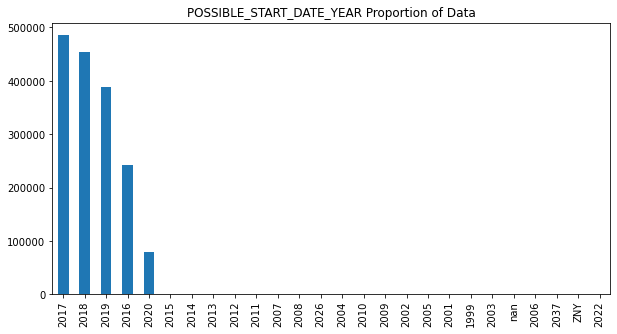

In [102]:
df['POSSIBLE_START_DATE_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                               title='POSSIBLE_START_DATE_YEAR Proportion of Data',
                                                               figsize=(10, 5));

#### POSSIBLE_END_DATE
* Did not get parsed as dates. 
    * Parsed through custom fuction
* Most entries from 2016-2019
* Includes chart

In [103]:
df['POSSIBLE_END_DATE'].value_counts(dropna=False)

NaN                    22156
2018-01-31 23:59:00      959
2017-06-30 23:59:00      735
2019-12-31 23:59:00      728
2017-10-31 23:59:00      724
                       ...  
2017-04-02 03:02:00        1
2018-05-26 12:49:00        1
2017-03-31 02:57:00        1
2018-05-26 12:52:00        1
2020-06-03 19:48:00        1
Name: POSSIBLE_END_DATE, Length: 341714, dtype: int64

In [104]:
df['POSSIBLE_END_DATE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                    0.01344
2018-01-31 23:59:00    0.00058
2017-06-30 23:59:00    0.00045
2019-12-31 23:59:00    0.00044
2017-10-31 23:59:00    0.00044
                        ...   
2017-04-02 03:02:00    0.00000
2018-05-26 12:49:00    0.00000
2017-03-31 02:57:00    0.00000
2018-05-26 12:52:00    0.00000
2020-06-03 19:48:00    0.00000
Name: POSSIBLE_END_DATE, Length: 341714, dtype: object

In [105]:
# df['POSSIBLE_END_DATE_YEAR']  = df['POSSIBLE_END_DATE'].apply(get_year)
# df['POSSIBLE_END_DATE_MONTH'] = df['POSSIBLE_END_DATE'].apply(get_month)
# df['POSSIBLE_END_DATE_DAY']   = df['POSSIBLE_END_DATE'].apply(get_day)

df['POSSIBLE_END_DATE'] = pd.to_datetime(df['POSSIBLE_END_DATE'], errors = 'coerce', format = '%Y/%m/%d %H:%M:%S')

df['POSSIBLE_END_DATE_YEAR']  = df['POSSIBLE_END_DATE'].dt.year.astype('Int64')

In [106]:
df['POSSIBLE_END_DATE_YEAR'].round(decimals=0)

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
1649073    2020
1649074    2020
1649075    2020
1649076    2020
1649077    2020
Name: POSSIBLE_END_DATE_YEAR, Length: 1649078, dtype: Int64

In [107]:
df['POSSIBLE_END_DATE_YEAR'] = df['POSSIBLE_END_DATE_YEAR'].round(decimals = 0)

In [108]:
np.round(df['POSSIBLE_END_DATE_YEAR'].value_counts(dropna=False))

2017    477660
2018    451757
2019    385337
2016    225951
2020     85622
<NA>     22156
2021       482
2022        45
2015        15
2026        14
2023         8
2030         8
2014         4
2027         3
2028         3
2029         2
2031         2
2024         2
2008         2
2006         1
2012         1
2009         1
2002         1
2025         1
Name: POSSIBLE_END_DATE_YEAR, dtype: Int64

In [109]:
df['POSSIBLE_END_DATE_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2017    0.28965
2018    0.27395
2019    0.23367
2016    0.13702
2020    0.05192
<NA>    0.01344
2021    0.00029
2022    0.00003
2015    0.00001
2026    0.00001
2023    0.00000
2030    0.00000
2014    0.00000
2027    0.00000
2028    0.00000
2029    0.00000
2031    0.00000
2024    0.00000
2008    0.00000
2006    0.00000
2012    0.00000
2009    0.00000
2002    0.00000
2025    0.00000
Name: POSSIBLE_END_DATE_YEAR, dtype: object

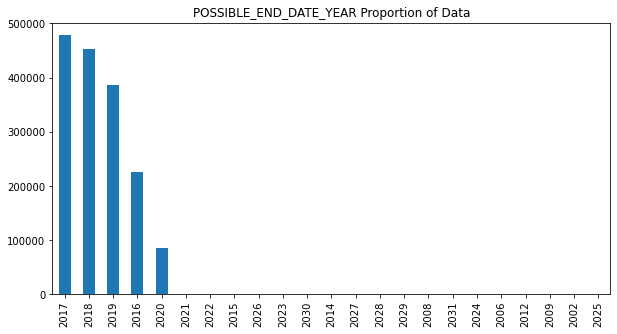

In [110]:
df['POSSIBLE_END_DATE_YEAR'].value_counts().plot(kind='bar',               
                                                 title='POSSIBLE_END_DATE_YEAR Proportion of Data',
                                                 figsize=(10, 5));

#### ADDED: POSSIBLE_DURATION
* Biggest category is 3 days, representing 17% of the data
* A few other categories represent >1% of data
    * 1 day is 2.5% of the data
    * 2, 3, and 4 hours acount for ~2.3% of the data each
* No other category accounts for >1% of the data
* Includes chart

In [111]:
poss_dur_lst = []
for _, row in df.iterrows():
    if (isinstance(row.POSSIBLE_END_DATE,   datetime) and 
        isinstance(row.POSSIBLE_START_DATE, datetime)):
        poss_dur_lst.append(row.POSSIBLE_END_DATE - row.POSSIBLE_START_DATE)
    else:
        poss_dur_lst.append(np.nan)

In [112]:
df['POSSIBLE_DURATION'] = poss_dur_lst

In [113]:
df['POSSIBLE_DURATION'].value_counts(dropna=False)

3 days 00:00:00     282336
1 days 00:00:00      42590
0 days 02:00:00      39274
0 days 03:00:00      37833
0 days 04:00:00      34736
                     ...  
27 days 07:39:00         1
21 days 19:39:00         1
34 days 18:32:00         1
60 days 04:44:00         1
64 days 01:37:00         1
Name: POSSIBLE_DURATION, Length: 85589, dtype: int64

In [114]:
df['POSSIBLE_DURATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

3 days 00:00:00     0.17121
1 days 00:00:00     0.02583
0 days 02:00:00     0.02382
0 days 03:00:00     0.02294
0 days 04:00:00     0.02106
                     ...   
27 days 07:39:00    0.00000
21 days 19:39:00    0.00000
34 days 18:32:00    0.00000
60 days 04:44:00    0.00000
64 days 01:37:00    0.00000
Name: POSSIBLE_DURATION, Length: 85589, dtype: object

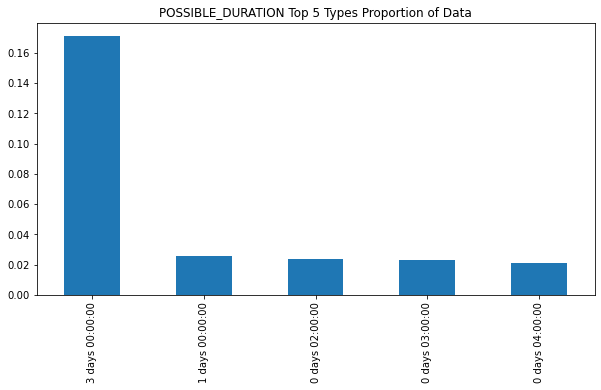

In [115]:
df['POSSIBLE_DURATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                    title='POSSIBLE_DURATION Top 5 Types Proportion of Data',
                                                                                    figsize=(10, 5));

#### ISSUE_DATE
* Did not get parsed as dates. 
    * Parsed through custom fuction
* Non-dates suggest data entry issues.
* Most entries from 2016-2019.
* Includes chart

In [116]:
df['ISSUE_DATE'] = df['ISSUE_DATE'].apply(convert_to_date)

In [117]:
df['ISSUE_DATE'].value_counts(dropna=False)

2018-09-15 21:01:00    245
ZNY                    212
2018-06-28 06:18:00    163
2018-09-10 21:04:00    153
2019-04-23 01:44:00    137
                      ... 
2017-06-25 08:50:00      1
2017-06-25 08:52:00      1
2018-09-15 09:30:00      1
2017-06-25 08:53:00      1
2020-05-31 12:50:00      1
Name: ISSUE_DATE, Length: 631306, dtype: int64

In [118]:
df['ISSUE_DATE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018-09-15 21:01:00    0.00015
ZNY                    0.00013
2018-06-28 06:18:00    0.00010
2018-09-10 21:04:00    0.00009
2019-04-23 01:44:00    0.00008
                        ...   
2017-06-25 08:50:00    0.00000
2017-06-25 08:52:00    0.00000
2018-09-15 09:30:00    0.00000
2017-06-25 08:53:00    0.00000
2020-05-31 12:50:00    0.00000
Name: ISSUE_DATE, Length: 631306, dtype: object

In [119]:
df['ISSUE_DATE_YEAR']  = df['ISSUE_DATE'].apply(get_year)
df['ISSUE_DATE_MONTH'] = df['ISSUE_DATE'].apply(get_month)
df['ISSUE_DATE_DAY']   = df['ISSUE_DATE'].apply(get_day)

In [120]:
df['ISSUE_DATE_YEAR'].value_counts(dropna=False)

2017    485451
2018    452638
2019    389229
2016    242339
2020     77783
2015       871
2014       274
ZNY        212
2013       101
2012        47
NaN         31
2011        25
2008        10
2004         8
2010         7
ZTL          7
ZJX          6
RKRR         6
2009         5
2002         5
ZBW          4
2003         3
2005         3
ZHU          2
2007         2
1999         2
ZDC          1
ZME          1
ZAN          1
ZHN          1
2006         1
ZUA          1
OJAC         1
Name: ISSUE_DATE_YEAR, dtype: int64

In [121]:
df['ISSUE_DATE_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2017    0.29438
2018    0.27448
2019    0.23603
2016    0.14695
2020    0.04717
2015    0.00053
2014    0.00017
ZNY     0.00013
2013    0.00006
2012    0.00003
NaN     0.00002
2011    0.00002
2008    0.00001
2004    0.00000
2010    0.00000
ZTL     0.00000
ZJX     0.00000
RKRR    0.00000
2009    0.00000
2002    0.00000
ZBW     0.00000
2003    0.00000
2005    0.00000
ZHU     0.00000
2007    0.00000
1999    0.00000
ZDC     0.00000
ZME     0.00000
ZAN     0.00000
ZHN     0.00000
2006    0.00000
ZUA     0.00000
OJAC    0.00000
Name: ISSUE_DATE_YEAR, dtype: object

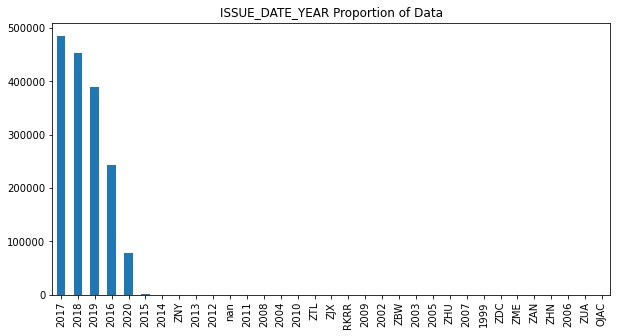

In [122]:
df['ISSUE_DATE_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                      title='ISSUE_DATE_YEAR Proportion of Data',
                                                      figsize=(10, 5));

#### CANCELED_DATE
* Did not get parsed as dates. 
    * Parsed through custom fuction
* Non-dates suggest data entry issues.
* Majority are NaN, covering 81% of the data.
* A few other categories represent >1% of data.
* Most entries from 2016-2019
* Includes chart

In [123]:
df['CANCELED_DATE'] = df['CANCELED_DATE'].apply(convert_to_date)

In [124]:
df['CANCELED_DATE'].value_counts(dropna=False)

NaT                    1391600
2016-05-31 18:59:00        189
2019-09-30 19:29:00        164
2016-11-30 23:46:00        154
2019-04-30 09:22:00        142
                        ...   
2017-11-10 04:51:00          1
2017-11-10 04:54:00          1
2017-11-10 04:53:00          1
2017-11-10 04:49:00          1
2020-05-31 12:47:00          1
Name: CANCELED_DATE, Length: 152707, dtype: int64

In [125]:
df['CANCELED_DATE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaT                    0.84387
2016-05-31 18:59:00    0.00011
2019-09-30 19:29:00    0.00010
2016-11-30 23:46:00    0.00009
2019-04-30 09:22:00    0.00009
                        ...   
2017-11-10 04:51:00    0.00000
2017-11-10 04:54:00    0.00000
2017-11-10 04:53:00    0.00000
2017-11-10 04:49:00    0.00000
2020-05-31 12:47:00    0.00000
Name: CANCELED_DATE, Length: 152707, dtype: object

In [126]:
df['CANCEL_DATE_YEAR']  = df['CANCELED_DATE'].apply(get_year)
df['CANCEL_DATE_MONTH'] = df['CANCELED_DATE'].apply(get_month)
df['CANCEL_DATE_DAY']   = df['CANCELED_DATE'].apply(get_day)

In [127]:
df['CANCEL_DATE_YEAR'].value_counts(dropna=False)

NaN                       1391600
2017                        71465
2019                        67853
2018                        65511
2016                        39384
2020                        13156
KZNY                           98
KZJX                            3
ZNY                             3
KZTL                            1
KZHU                            1
LAKEHURST MAXFIELD FLD          1
KZBW                            1
ZLA                             1
Name: CANCEL_DATE_YEAR, dtype: int64

In [128]:
df['CANCEL_DATE_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                       0.84387
2017                      0.04334
2019                      0.04115
2018                      0.03973
2016                      0.02388
2020                      0.00798
KZNY                      0.00006
KZJX                      0.00000
ZNY                       0.00000
KZTL                      0.00000
KZHU                      0.00000
LAKEHURST MAXFIELD FLD    0.00000
KZBW                      0.00000
ZLA                       0.00000
Name: CANCEL_DATE_YEAR, dtype: object

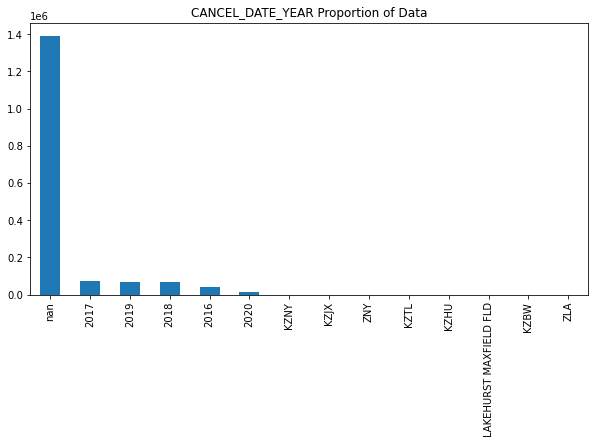

In [129]:
df['CANCEL_DATE_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                       title='CANCEL_DATE_YEAR Proportion of Data',
                                                       figsize=(10, 5)); 

#### AFFECTED_FIR
* NaN as biggest category, covering 40% of the data. 
* A couple of other entries have a material proportion of the data.
* A few repeats
* Includes chart

In [130]:
df['AFFECTED_FIR']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1649073    KZTL
1649074    KZSE
1649075     ZAU
1649076     NaN
1649077    YBBB
Name: AFFECTED_FIR, Length: 1649078, dtype: object

In [131]:
df['AFFECTED_FIR'].value_counts(dropna=False)

NaN     643137
LRBB     30173
EPWW     27001
UUWV     26494
EGTT     22858
         ...  
XX           1
OAAH         1
SCT          1
MKJM         1
SBWM         1
Name: AFFECTED_FIR, Length: 421, dtype: int64

In [132]:
df['AFFECTED_FIR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN     0.39000
LRBB    0.01830
EPWW    0.01637
UUWV    0.01607
EGTT    0.01386
         ...   
XX      0.00000
OAAH    0.00000
SCT     0.00000
MKJM    0.00000
SBWM    0.00000
Name: AFFECTED_FIR, Length: 421, dtype: object

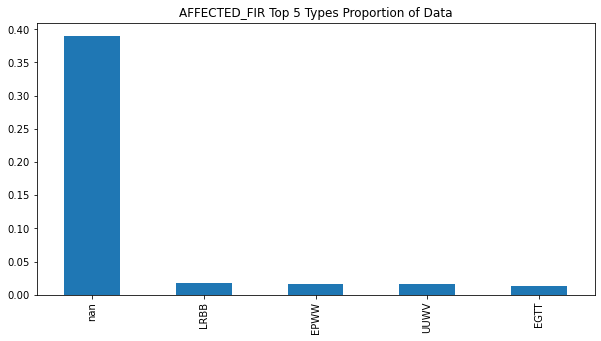

In [133]:
df['AFFECTED_FIR'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                               title='AFFECTED_FIR Top 5 Types Proportion of Data',
                                                                               figsize=(10, 5));

#### DESIGNATOR
* Majority are NaNs, covering 75% of the data.
* No other entry has a material proportion of the data.
* A few repeats

In [134]:
df['DESIGNATOR']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1649073    NaN
1649074    NaN
1649075    BTL
1649076    HCR
1649077    NaN
Name: DESIGNATOR, Length: 1649078, dtype: object

In [135]:
df['DESIGNATOR'].value_counts(dropna=False)

NaN                1249292
DFW                   2609
MEM                   2531
DTW                   1910
PHL                   1688
                    ...   
UACC                     1
YPA                      1
LSAS                     1
LITTLE ROCK AFB          1
MI8                      1
Name: DESIGNATOR, Length: 6232, dtype: int64

In [136]:
df['DESIGNATOR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                0.75757
DFW                0.00158
MEM                0.00153
DTW                0.00116
PHL                0.00102
                    ...   
UACC               0.00000
YPA                0.00000
LSAS               0.00000
LITTLE ROCK AFB    0.00000
MI8                0.00000
Name: DESIGNATOR, Length: 6232, dtype: object

#### DESIGNATOR_NAME
* Majority are NaNs, covering 77% of the data.
    * Proportions do not match DESIGNATOR > What does this mean?
* No other entry has a material proportion of the data.
* A few repeats

In [137]:
df['DESIGNATOR_NAME']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
               ...     
1649073             NaN
1649074             NaN
1649075     W K KELLOGG
1649076    HEBER VALLEY
1649077             NaN
Name: DESIGNATOR_NAME, Length: 1649078, dtype: object

In [138]:
df['DESIGNATOR_NAME'].value_counts(dropna=False)

NaN                                  1284474
DALLAS-FORT WORTH INTL                  2484
MEMPHIS INTL                            2468
DETROIT METROPOLITAN WAYNE COUNTY       1856
PHILADELPHIA INTL                       1658
                                      ...   
YAKATAGA                                   1
SABRE AHP (FORT CAMPBELL)                  1
VAN PAK                                    1
Elkton                                     1
HEBER VALLEY                               1
Name: DESIGNATOR_NAME, Length: 7867, dtype: int64

In [139]:
df['DESIGNATOR_NAME'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                  0.77890
DALLAS-FORT WORTH INTL               0.00151
MEMPHIS INTL                         0.00150
DETROIT METROPOLITAN WAYNE COUNTY    0.00113
PHILADELPHIA INTL                    0.00101
                                      ...   
YAKATAGA                             0.00000
SABRE AHP (FORT CAMPBELL)            0.00000
VAN PAK                              0.00000
Elkton                               0.00000
HEBER VALLEY                         0.00000
Name: DESIGNATOR_NAME, Length: 7867, dtype: object

#### LOCATION_NAME
* No entry accounts for more than 8% of the data
* A couple of other entries have a material proportion of the data.
* Includes chart

In [140]:
df['LOCATION_NAME']

0                                  ZAU ARTCC
1                                  ZAU ARTCC
2                                  ZMP ARTCC
3                                  ZMP ARTCC
4                                  ZMP ARTCC
                         ...                
1649073    HARTSFIELD - JACKSON ATLANTA INTL
1649074          ROGUE VALLEY INTL - MEDFORD
1649075                          W K KELLOGG
1649076                         HEBER VALLEY
1649077                        COFFS HARBOUR
Name: LOCATION_NAME, Length: 1649078, dtype: object

In [141]:
df['LOCATION_NAME'].value_counts(dropna=False)

FDC                             109543
ZSE ARTCC                        31846
CIVIL AERONAUTICAL AUTHORITY     28898
MOSKVA FIR                       26576
NaN                              20317
                                 ...  
IWAMI                                1
TAJIMA                               1
STAPLEFORD                           1
CAMP BONDSTEEL AHP                   1
SAULT STE MARIE INTL                 1
Name: LOCATION_NAME, Length: 11549, dtype: int64

In [142]:
df['LOCATION_NAME'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

FDC                             0.06643
ZSE ARTCC                       0.01931
CIVIL AERONAUTICAL AUTHORITY    0.01752
MOSKVA FIR                      0.01612
NaN                             0.01232
                                 ...   
IWAMI                           0.00000
TAJIMA                          0.00000
STAPLEFORD                      0.00000
CAMP BONDSTEEL AHP              0.00000
SAULT STE MARIE INTL            0.00000
Name: LOCATION_NAME, Length: 11549, dtype: object

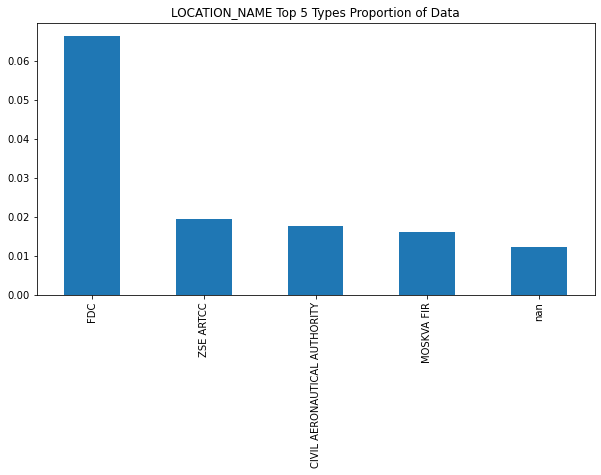

In [143]:
df['LOCATION_NAME'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                title='LOCATION_NAME Top 5 Types Proportion of Data',
                                                                                figsize=(10, 5));

#### ACCOUNT_ID
* No entry accounts for more than 11% of the data
* A couple of other entries have a material proportion of the data.
* Includes chart

In [144]:
df['ACCOUNT_ID']

0              SUAC
1              SUAC
2              SUAC
3              SUAC
4              SUAC
             ...   
1649073         ATL
1649074        KMFR
1649075         BTL
1649076         CDC
1649077    YBBBZEZX
Name: ACCOUNT_ID, Length: 1649078, dtype: object

In [145]:
df['ACCOUNT_ID'].value_counts(dropna=False)

FDC         145466
UUUUYNYX     98887
SUAW         64710
SUAC         43768
YBBBZEZX     40594
             ...  
BPC              1
ZMHGYNYX         1
HKMP             1
KCVC             1
UGTBYNYX         1
Name: ACCOUNT_ID, Length: 2803, dtype: int64

In [146]:
df['ACCOUNT_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

FDC         0.08821
UUUUYNYX    0.05997
SUAW        0.03924
SUAC        0.02654
YBBBZEZX    0.02462
             ...   
BPC         0.00000
ZMHGYNYX    0.00000
HKMP        0.00000
KCVC        0.00000
UGTBYNYX    0.00000
Name: ACCOUNT_ID, Length: 2803, dtype: object

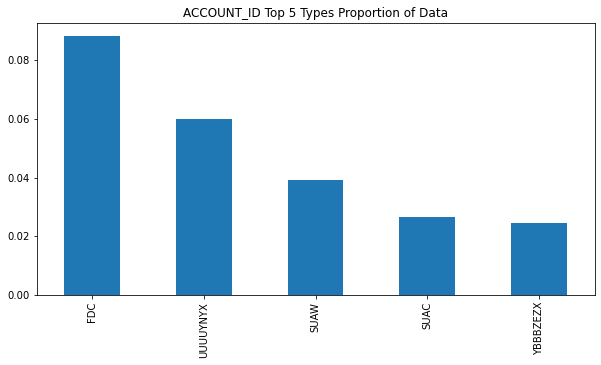

In [147]:
df['ACCOUNT_ID'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                             title='ACCOUNT_ID Top 5 Types Proportion of Data',
                                                                             figsize=(10, 5));

#### LOCATION_CODE
* Seems to match (though not perfectly) LOCATION_NAME
* No entry accounts for more than 8% of the data
* A couple of other entries have a material proportion of the data.
* Includes chart

In [148]:
df['LOCATION_CODE']

0           ZAU
1           ZAU
2           ZMP
3           ZMP
4           ZMP
           ... 
1649073     ATL
1649074     MFR
1649075    KBTL
1649076    KHCR
1649077    YCFS
Name: LOCATION_CODE, Length: 1649078, dtype: object

In [149]:
df['LOCATION_CODE'].value_counts(dropna=False)

FDC     109541
ZSE      31842
LRBB     28899
UUWV     26578
ZLA      18507
         ...  
KI50         1
K05C         1
K5A9         1
KP91         1
HECP         1
Name: LOCATION_CODE, Length: 14400, dtype: int64

In [150]:
df['LOCATION_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

FDC     0.06643
ZSE     0.01931
LRBB    0.01752
UUWV    0.01612
ZLA     0.01122
         ...   
KI50    0.00000
K05C    0.00000
K5A9    0.00000
KP91    0.00000
HECP    0.00000
Name: LOCATION_CODE, Length: 14400, dtype: object

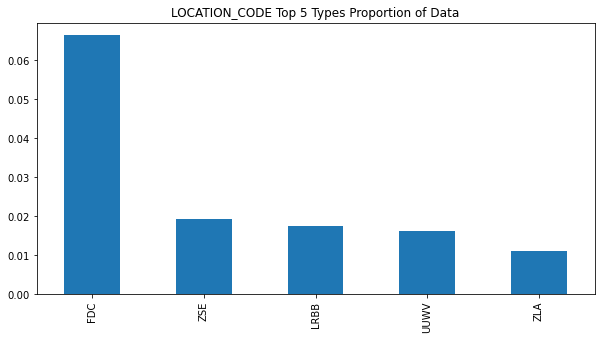

In [151]:
df['LOCATION_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                               title='LOCATION_CODE Top 5 Types Proportion of Data',
                                                                               figsize=(10, 5));

#### LAUNCHES_REC_ID
* All values are NaN

In [152]:
df['LAUNCHES_REC_ID']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1649073   NaN
1649074   NaN
1649075   NaN
1649076   NaN
1649077   NaN
Name: LAUNCHES_REC_ID, Length: 1649078, dtype: float64

In [153]:
df['LAUNCHES_REC_ID'].value_counts(dropna=False)

NaN    1649078
Name: LAUNCHES_REC_ID, dtype: int64

## Keywords Analysis

* text file split into `inclusionwords` and `exclusionwords`
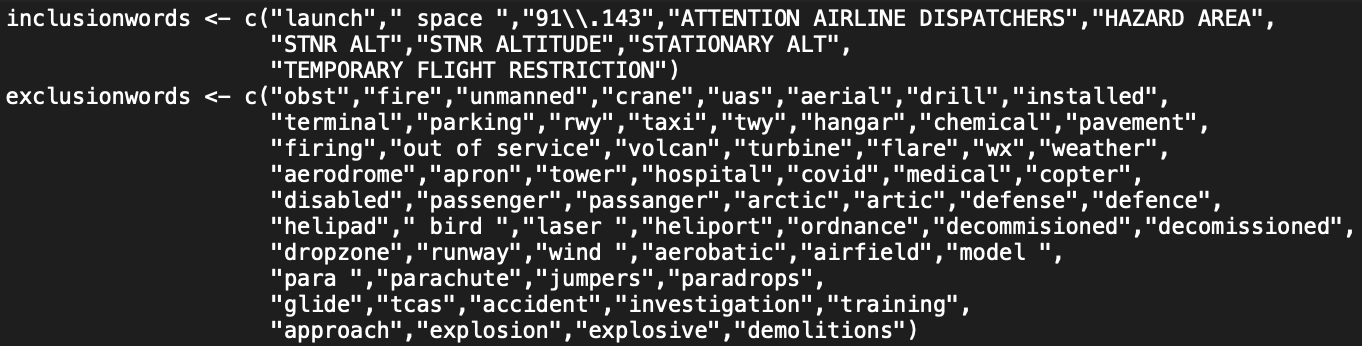

In [154]:
# Create lists with keywords
words_include = ["launch", "space", "91\\.143", "ATTENTION AIRLINE DISPATCHERS", "HAZARD AREA",
                 "STNR ALT", "STNR ALTITUDE", "STATIONARY ALT", "TEMPORARY FLIGHT RESTRICTION"]

words_exclude  = ["obst", "fire", "unmanned", "crane", "uas", "aerial", "drill", "installed",
                  "terminal", "parking", "rwy", "taxi", "twy", "hangar", "chemical", "pavement",
                  "firing", "out of service", "volcan","turbine", "flare", "wx", "weather",
                  "aerodrome", "apron", "tower", "hospital", "covid", "medical", "copter",
                  "disabled", "passenger", "passanger", "arctic", "artic", "defense", "defence",
                  "helipad", "bird", "laser ", "heliport", "ordnance", "decommisioned", 
                  "decomissioned", "dropzone", "runway", "wind", "aerobatic", "airfield", "model",
                  "para", "parachute", "jumpers", "paradrops", "glide", "tcas", "accident",
                  "investigation", "training", "approach", "explosion", "explosive", "demolitions"]

In [155]:
# helper functions to get words
def has_include_word(row):
    if isinstance(row, str):
        return_words = []
        for w in words_include:
            if w.lower() in row.lower():
                return_words.append(w)        
        return return_words if return_words else np.nan
    else:
        return np.nan

def has_exclude_word(row):
    if isinstance(row, str):
        return_words = []
        for w in words_exclude:
            if w.lower() in row.lower():
                return_words.append(w)     
        return return_words if return_words else np.nan
    else:
        return np.nan

In [156]:
df['Inclusion_Words'] = df['TEXT'].apply(has_include_word)
df['Exclusion_Words'] = df['TEXT'].apply(has_exclude_word)

In [157]:
df['Inclusion_Words'].value_counts(dropna=False)

NaN                                                            1374533
[space]                                                         257353
[space, TEMPORARY FLIGHT RESTRICTION]                             4300
[STNR ALT]                                                        4185
[space, STNR ALT]                                                 2954
[launch]                                                          2657
[launch, space]                                                    845
[STATIONARY ALT]                                                   767
[space, STATIONARY ALT]                                            413
[launch, space, TEMPORARY FLIGHT RESTRICTION]                      407
[TEMPORARY FLIGHT RESTRICTION]                                     152
[launch, space, ATTENTION AIRLINE DISPATCHERS, HAZARD AREA]        150
[launch, space, STNR ALT]                                           91
[ATTENTION AIRLINE DISPATCHERS]                                     81
[launc

In [158]:
df['Exclusion_Words'].value_counts(dropna=False)

NaN                                             945792
[rwy]                                           123097
[obst, out of service, tower]                   100872
[rwy, out of service]                            74091
[out of service]                                 38513
                                                 ...  
[aerodrome, artic, airfield, approach]               1
[obst, runway, wind, approach]                       1
[flare, approach]                                    1
[terminal, rwy, para]                                1
[obst, crane, installed, aerodrome, helipad]         1
Name: Exclusion_Words, Length: 3524, dtype: int64